In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#URL West Texas Intermediate Crude Oil Price, Annual
url_price = "http://api.eia.gov/series/?api_key=4a60fcfe3a762ea4e4d9276f8944aa76&series_id=STEO.WTIPUUS.A"
url_price_TETCD = "http://api.eia.gov/series/?api_key=4a60fcfe3a762ea4e4d9276f8944aa76&series_id=SEDS.TETCD.US.A"
url_price_coal = "http://api.eia.gov/series/?api_key=4a60fcfe3a762ea4e4d9276f8944aa76&series_id=STEO.CLEUDUS.A"
url_price_naturalgas = "http://api.eia.gov/series/?api_key=4a60fcfe3a762ea4e4d9276f8944aa76&series_id=STEO.NGHHUUS.A"
Price_CSV = "resources/energy_price.csv"
Price_graph = "output/"

In [3]:
price = requests.get(url_price).json()
priceTETCD = requests.get(url_price_TETCD).json()
pricecoal = requests.get(url_price_coal).json()
pricenaturalgas = requests.get(url_price_naturalgas).json()
print(json.dumps(priceTETCD, indent=4, sort_keys=True))


{
    "request": {
        "command": "series",
        "series_id": "SEDS.TETCD.US.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2016",
                    15.91
                ],
                [
                    "2015",
                    17.27
                ],
                [
                    "2014",
                    21.28
                ],
                [
                    "2013",
                    21.38
                ],
                [
                    "2012",
                    21.8
                ],
                [
                    "2011",
                    21.83
                ],
                [
                    "2010",
                    18.9
                ],
                [
                    "2009",
                    17.23
                ],
                [
                    "2008",
                    21.51
                ],
        

In [4]:
year = []
price_value = []
price_TETCD = []
year_TETCD = []
price_COAL = []
year_COAL = []
price_NATURALGAS = []
year_NATURALGAS = []
for x in price['series'][0]['data']:
    year.append(x[0])
    price_value.append(x[1])   
for x in priceTETCD['series'][0]['data']:
    year_TETCD.append(x[0])
    price_TETCD.append(x[1])
for x in pricecoal['series'][0]['data']:
    year_COAL.append(x[0])
    price_COAL.append(x[1])
for x in pricenaturalgas['series'][0]['data']:
    year_NATURALGAS.append(x[0])
    price_NATURALGAS.append(x[1])


In [5]:
Oil_data = pd.DataFrame({"year":year, "Price of Oil":price_value}, index= year)
# may delete this total energy column later on
#TETCD_data = pd.DataFrame({"year":year_TETCD, "Average price of Total Energy":price_TETCD}, index= year)
Coal_data = pd.DataFrame({"year":year_COAL, "Price of Coal":price_COAL}, index= year_COAL)
naturalgas_data = pd.DataFrame({"year":year_NATURALGAS, "Price of Natural Gas":price_NATURALGAS}, index= year_NATURALGAS)
Price_data_init = naturalgas_data.merge(Coal_data,left_on='year', right_on='year')
Price_data_final = Price_data_init.merge(Oil_data,left_on='year', right_on='year')
#Price_data_CSV = Price_data_final.to_csv(Price_CSV, encoding='utf-8', index=False)
Price_data_final = Price_data_final.reindex(index=Price_data_final.index[::-1])
Price_data_final_visual = Price_data_final.set_index("year")
Price_data_final_visual

,Price of Natural Gas,Price of Coal,Price of Oil
year,,,
1990,1.698333,1.454065,24.500317
1991,1.486667,1.446003,21.527956
1992,1.771667,1.411528,20.583705
1993,2.120833,1.384865,18.410472
1994,1.920000,1.355419,17.208427
1995,1.686667,1.317057,18.427258
1996,2.756667,1.288237,22.132134
1997,2.497417,1.272109,20.588635
1998,2.090917,1.251777,14.415439


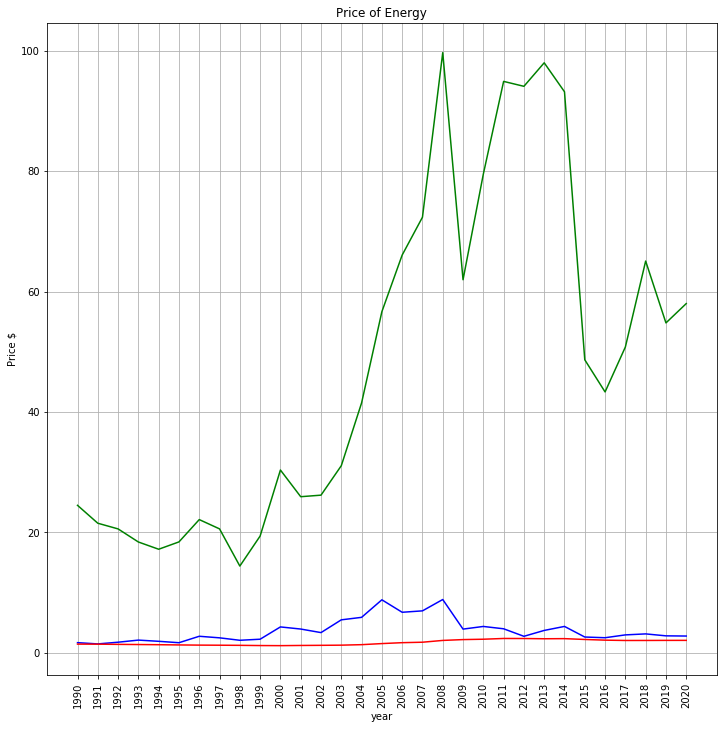

In [6]:
width = 12
height = 12
plt.figure(figsize=(width, height))
gas, = plt.plot(Price_data_final['year'],Price_data_final['Price of Natural Gas'] , color="blue", label="Natural Gas" )
oil, = plt.plot(Price_data_final['year'],Price_data_final['Price of Oil'] , color="green", label="Oil" )
coal, = plt.plot(Price_data_final['year'],Price_data_final['Price of Coal'] , color="red", label="Coal" )
plt.xticks(rotation=90)
plt.title("Price of Energy")
plt.grid(True)
plt.xlabel("year")
plt.ylabel("Price $")
overgraph = Price_graph + "Price of Energy.png"
plt.savefig(overgraph)

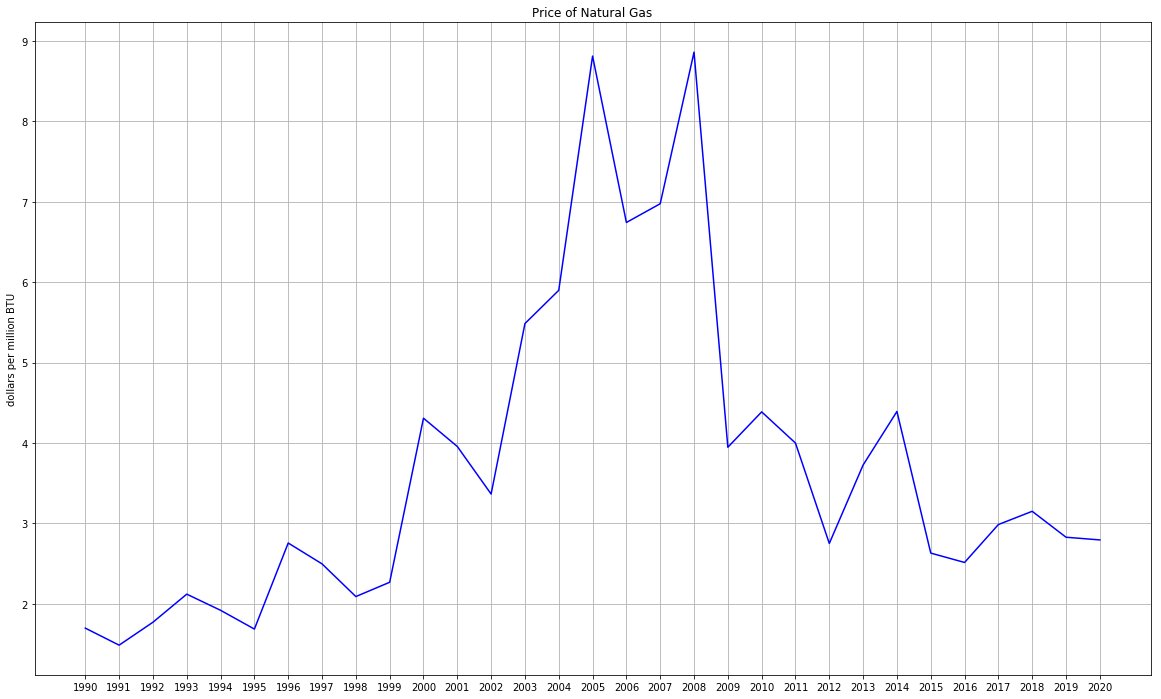

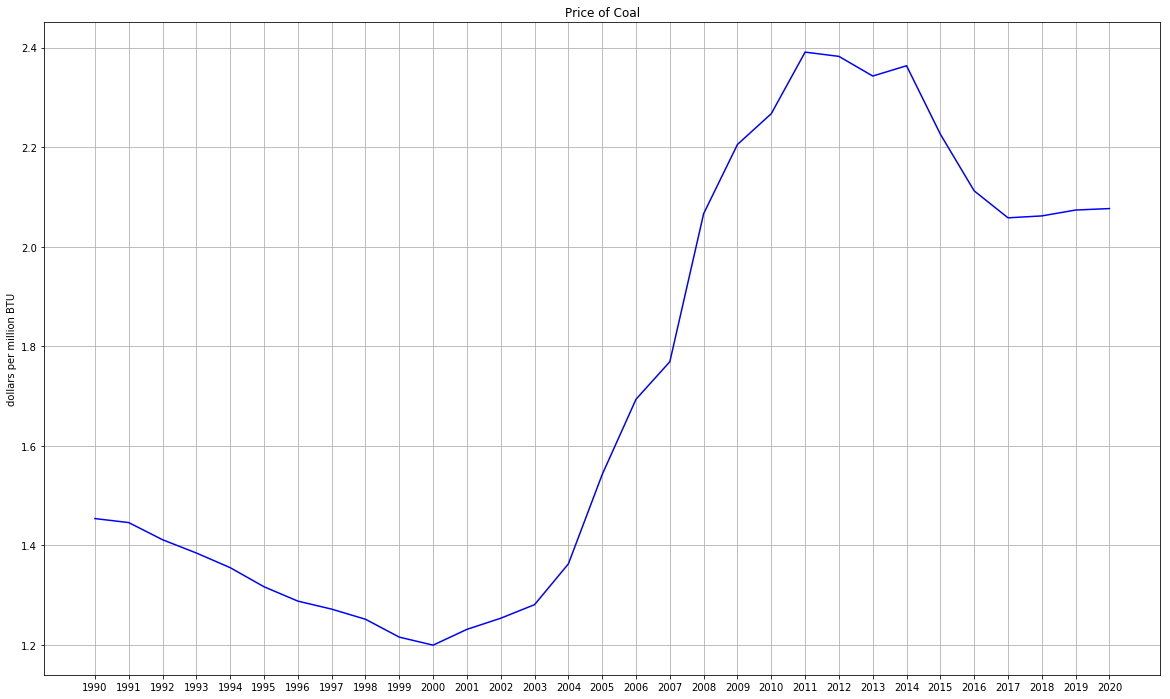

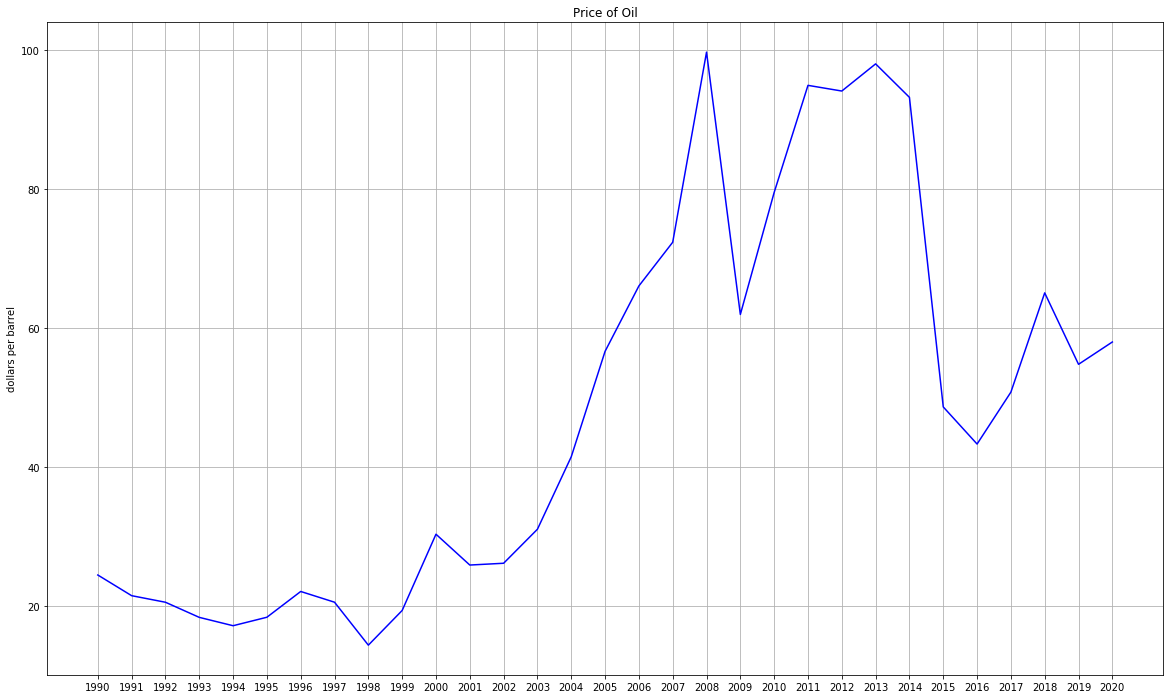

In [7]:
for column in Price_data_final_visual.columns[0:]:
    width = 20
    height = 12
    if column == "Price of Oil":
        x = "dollars per barrel"
    else: 
        x ="dollars per million BTU"
    plt.figure(figsize=(width, height))
    plt.plot(Price_data_final['year'], Price_data_final[column] , color="blue", label=column)
    plt.grid(True)
    plt.title(column)
    plt.ylabel(x)
    y =Price_graph + column + " graph.png"
    plt.savefig(y)

In [10]:
Price_CSV = Price_data_final_visual.to_csv(Price_CSV, encoding='utf-8', index=True)

NameError: name 'TRUE' is not defined